<a href="https://colab.research.google.com/github/ramonparaiba/Aulas-Logica-de-Programcao-e-Algoritmos/blob/main/Logica_Fuzzy_001_gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy - exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* ou a qualidade da comida for *saborosa* então a gorjeta será *alta*

## Instalação e importação das bibliotecas

- !pip install scikit-fuzzy

- import numpy as np
- import skfuzzy as fuzz
- from skfuzzy import control as ctrl

In [68]:
#instal scikit-fuzzy
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e Consequentes



* Antecedentes
  * qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
    * qualidade
    * qualidade.universe
  * servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
    * servico
    * servico.universe
* Consequentes
  * gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')
    * gorjeta
    * gorjeta.universe

In [76]:
#Antecedentes
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [77]:
#Consequente
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

#Funções de membership

A função "automf" é usada para gerar automaticamente as funções de pertinência para as variáveis de entrada e saída de um sistema de lógica fuzzy. Essas funções de pertinência descrevem a "gradação" ou "grau de pertinência" com que uma variável de entrada pertence a um conjunto de categorias definidas.

* qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
* servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

* visualização
  * qualidade.view()
  * qualidade['saborosa'].view()
  * servico.view()
* gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8])
* gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
* gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12, 20, 20])

* gorjeta.view()

## Regras
* regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
* regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
* regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

In [ ]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
qualidade['saborosa'].view()

In [ ]:
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])
servico.view()

In [ ]:
#Função do consequente
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 5.5])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2.5, 10, 17.5])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12.5, 20, 20])

gorjeta.view()

In [91]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(qualidade['saborosa'] | servico['ótimo'], gorjeta['alta'])


# Sistema de Controle





* sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
 - --------------------------
* sistema = ctrl.ControlSystemSimulation(sistema_controle)
 - --------------------------
* sistema.input['qualidade'] = 10
* sistema.input['servico'] = 10
* sistema.compute()
  - ----------------
* print(sistema.output['gorjeta'])
* gorjeta.view(sim = sistema)




In [92]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [93]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [110]:
sistema.input['qualidade'] = 6
sistema.input['servico'] = 9
sistema.compute()

14.108308605341248


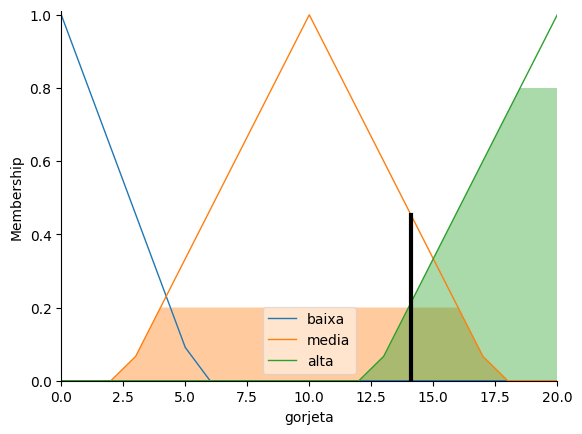

In [111]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)

# Utilizando outras funções para fazer a análise

* gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, 1)
* gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
* gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)

#Exercício
Suponha que uma loja de roupas deseje classificar seus produtos em três categorias: "barato", "razoável" e "caro". A loja pode usar a lógica fuzzy para fazer essa classificação com base em diferentes variáveis, como o preço do produto, a qualidade do material e a marca.

* Antecedentes
 - Preço: varia de 0 a 100, onde 0 é muito barato e 100 é muito caro.
 - Qualidade do material: varia de 0 a 10, onde 0 é muito ruim e 10 é muito bom.
 - Marca: varia de 0 a 5, onde 0 é uma marca desconhecida e 5 é uma marca muito conhecida.

*Consequente
   - categoria (barato, razoável ou caro)

 - --------
**Regras**

1.  Se o preço for baixo E a qualidade do material for baixa, então o produto é "barato".
2. Se a qualidade do material for alta OU a marca for conhecida, então o produto é "razoável".
3. Se o preço for alto E a qualidade do material for alta E a marca for muito conhecida, então o produto é "caro".
